In [1]:
import pandas as pd 
from sklearn.metrics import classification_report, mean_squared_error,confusion_matrix, f1_score
from sklearn.metrics import accuracy_score, precision_score,recall_score, auc,roc_curve
from tld import get_tld, is_tld
from sklearn.model_selection import train_test_split
import random
import math
from collections import Counter
import time
from bs4 import BeautifulSoup
import urllib
from urllib.parse import urlparse, parse_qs
from datasets import load_dataset
from datasets import Dataset
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, metrics
import matplotlib.pyplot as plt
import re
from urllib.parse import urlparse
import warnings
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
warnings.filterwarnings('ignore')

**Now ,lets begin reading our data and preview some information!!!**

In [3]:
"""
This part Loads and Inspect our data ,
It performs the following tasks:
1. Reads our CSV file into a Pandas DataFrame.
2. Prints the shape of the DataFrame, indicating the number of rows and columns.
3. Displays detailed information about the DataFrame, including:
   - Column names
   - Non-null counts
   - Data types of each column
"""
file_path = 'url.csv'
df = pd.read_csv(file_path)
print(df.shape)
print(df.info())

(651191, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB
None


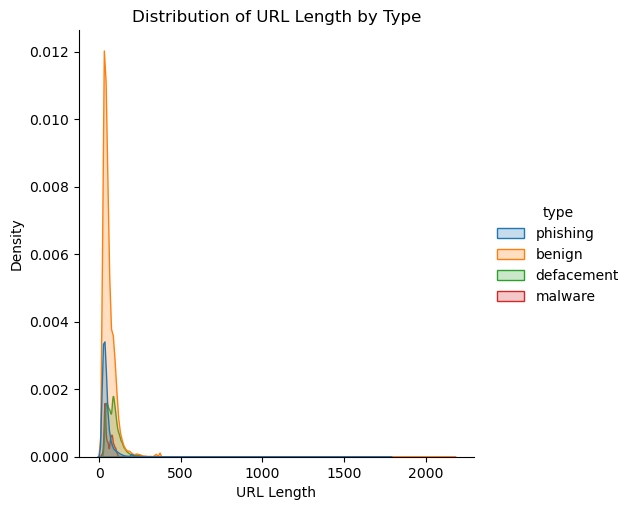

In [4]:
"""
This part to Add URL Length Feature and Plot Distribution

It performs the following tasks:
1. Adds a new column 'url_len' to the DataFrame, which contains the length of each URL in the 'url' column.
2. Plots the distribution of 'url_len' for each 'type' using a Kernel Density Estimation (KDE) plot.
3. Customizes the plot with labels and a title to provide context and clarity.

"""
# Add a new column 'url_len' that contains the length of each URL in the 'url' column
df['url_len'] = [len(url) for url in df.url]

# Plot the distribution of 'url_len' for each 'type' using a Kernel Density Estimation (KDE) plot
sns.displot(df, x='url_len', hue='type', kind='kde', fill=True)

# Add labels and a title to the plot for clarity
plt.xlabel('URL Length')  # Label for the x-axis
plt.ylabel('Density')     # Label for the y-axis
plt.title('Distribution of URL Length by Type')  # Title for the plot

# Display the plot
plt.show()





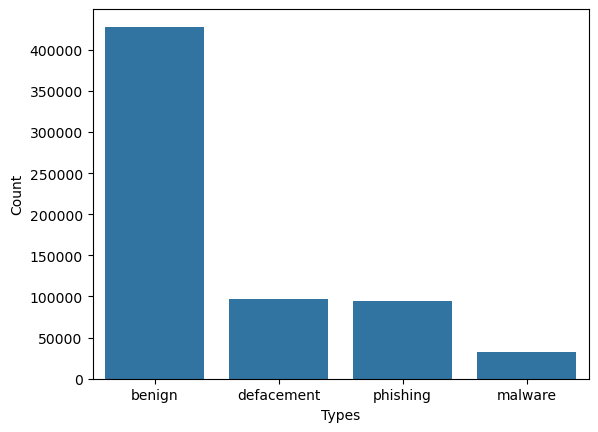

In [5]:
"""
Script to Visualize the Count of Each Type in the Dataset

This script performs the following tasks:
1. Counts the occurrences of each unique value in the 'type' column using value_counts().
2. Plots a bar chart to visualize the count of each 'type' using sns.barplot().
3. Adds labels to the x-axis and y-axis for clarity.

"""

count = df.type.value_counts()   # Count the occurrences of each unique value in the 'type' column

sns.barplot(x=count.index, y=count) # Create a bar plot to visualize the count of each 'type'

# Add labels to the plot for better clarity

plt.xlabel('Types')  # Label for the x-axis (type categories)
plt.ylabel('Count')  # Label for the y-axis (number of occurrences)

plt.show() # Display the plot

In [6]:
"""
Remove 'www.' Prefix from URLs in the 'url' Column

This part performs the following task:
- Replaces any occurrences of the 'www.' prefix in the 'url' column of the DataFrame with an empty string, effectively removing it.

Usage:
- This is useful when you want to standardize URLs by removing the 'www.' part, making comparisons or further processing more consistent.

Details:
- The replace() method with regex=True is used to apply a regular expression, removing 'www.' wherever it appears in the URL.

"""
df['url'] = df['url'].replace('www.', '', regex=True)

In [7]:
"""
This script performs the following operations on a DataFrame:

1. Copies the values from the 'type' column into a new column called 'Category'.
2. Replaces the values in the 'Category' column based on a predefined mapping (rem).
   The mapping 'rem' associates string categories ('benign', 'defacement', 'phishing', 'malware') with integer values.

"""
rem = {"Category": {"benign": 0, "defacement": 1, "phishing":2, "malware":3}}
df['Category'] = df['type']
df = df.replace(rem)
df

,url,type,url_len,Category
0,br-icloud.com.br,phishing,16,2
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,88,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,1
...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,39,2
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,44,2
651188,gamespot.com/xbox360/action/deadspace/,phishing,42,2
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,45,2


In [8]:
def process_tld(url):
    """
This script defines a function process_tld that extracts the primary domain from a URL.

The function attempts to get the top-level domain (TLD) using the get_tld function. If successful, it returns the primary domain, otherwise, 
it returns None.
The primary domain is then applied to the 'url' column of a DataFrame, and the results are stored in a new 'domain' column.
The first few rows of the DataFrame are printed using print(df.head).
"""
    try:
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except :
        pri_domain= None
    return pri_domain
df['domain'] = df['url'].apply(lambda i: process_tld(i))
print(df.head)

<bound method NDFrame.head of                                                       url        type  \
0                                        br-icloud.com.br    phishing   
1                     mp3raid.com/music/krizz_kaliko.html      benign   
2                         bopsecrets.org/rexroth/cr/1.htm      benign   
3       http://garage-pirenne.be/index.php?option=com_...  defacement   
4       http://adventure-nicaragua.net/index.php?optio...  defacement   
...                                                   ...         ...   
651186            xbox360.ign.com/objects/850/850402.html    phishing   
651187       games.teamxbox.com/xbox-360/1860/Dead-Space/    phishing   
651188             gamespot.com/xbox360/action/deadspace/    phishing   
651189      en.wikipedia.org/wiki/Dead_Space_(video_game)    phishing   
651190              angelfire.com/goth/devilmaycrytonite/    phishing   

        url_len  Category                   domain  
0            16         2         br-icl

In [9]:
"""
This script defines a list of special characters feature and counts their occurrences in the 'url' column of a DataFrame.

For each character in the feature list, the script applies a lambda function to count its occurrences in each URL, and stores the result in new columns named after the character.

Finally, it prints the first few rows of the modified DataFrame using print(df.head).
"""
feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//'] #waf
for a in feature:
    df[a] = df['url'].apply(lambda i: i.count(a))
print(df.head)

<bound method NDFrame.head of                                                       url        type  \
0                                        br-icloud.com.br    phishing   
1                     mp3raid.com/music/krizz_kaliko.html      benign   
2                         bopsecrets.org/rexroth/cr/1.htm      benign   
3       http://garage-pirenne.be/index.php?option=com_...  defacement   
4       http://adventure-nicaragua.net/index.php?optio...  defacement   
...                                                   ...         ...   
651186            xbox360.ign.com/objects/850/850402.html    phishing   
651187       games.teamxbox.com/xbox-360/1860/Dead-Space/    phishing   
651188             gamespot.com/xbox360/action/deadspace/    phishing   
651189      en.wikipedia.org/wiki/Dead_Space_(video_game)    phishing   
651190              angelfire.com/goth/devilmaycrytonite/    phishing   

        url_len  Category                   domain  @  ?  -  =  .  #  %  +  $  \
0           

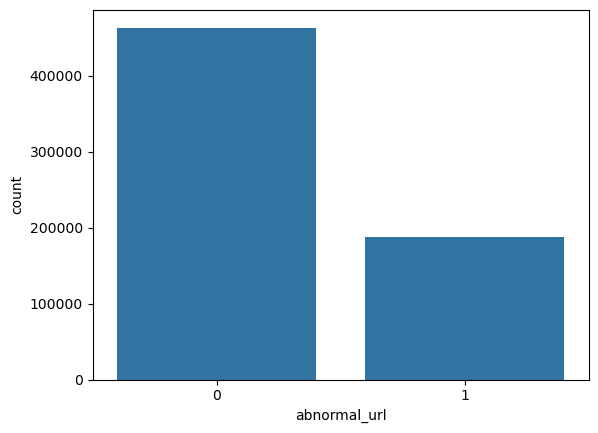

In [10]:
"""
This script defines a function abnormal_url that checks if the hostname of a URL matches a pattern within the URL itself.

The function extracts the hostname from the URL using urlparse, converts it to a string, and searches for this hostname within the URL. 
If a match is found, it returns 1 (normal URL), otherwise, it returns 0 (abnormal URL).

The abnormal_url function is then applied to the 'url' column of the DataFrame, and the results are stored in a new column called 'abnormal_url'.

Lastly, the script visualizes the distribution of abnormal vs. normal URLs using a count plot (sns.countplot), followed by displaying the plot using plt.show().
"""
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i)) 
sns.countplot(x='abnormal_url', data=df);
plt.show()

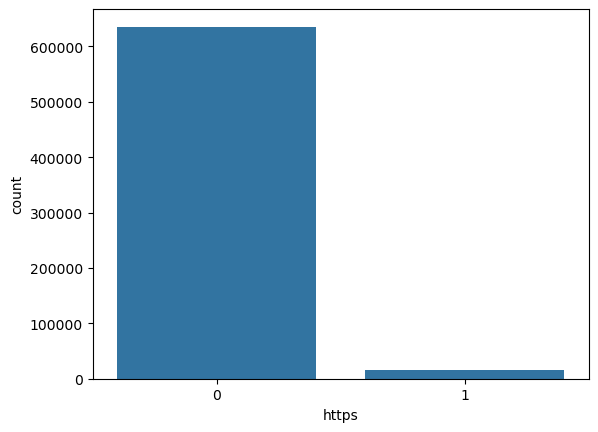

In [11]:
def httpSecure(url):
    """
This script defines a function httpSecure that checks whether a URL uses the HTTPS protocol.

The function extracts the scheme (protocol) from the URL using urlparse and checks if it is 'https'. 
If the URL uses HTTPS, it returns 1; otherwise, it returns 0.

The httpSecure function is applied to the 'url' column of the DataFrame, and the results are stored in a new column called 'https'.

Finally, the script visualizes the distribution of HTTPS and non-HTTPS URLs using a count plot (sns.countplot), followed by displaying the plot.
"""
    https = urlparse(url).scheme
    match = str(https)
    if match=='https':
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['https'] = df['url'].apply(lambda i: httpSecure(i)) # 1 IF USES HTTPS 0 IF NOT
sns.countplot(x='https', data=df);

In [12]:
def digit_count(url):
    """
This script defines a function digit_count that counts the number of digits in a given URL.

The function iterates over each character in the URL, checks if it is a numeric character using isnumeric(), 
and increments the digit counter accordingly. It then returns the total number of digits found.

The digit_count function is applied to the 'url' column of the DataFrame, and the results are stored in a new column called 'digits'.
"""
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
df['digits']= df['url'].apply(lambda i: digit_count(i))

In [13]:
def letter_count(url):
    """
This script defines a function letter_count that counts the number of alphabetic characters in a given URL.

The function iterates over each character in the URL, checks if it is an alphabetic character using isalpha(), 
and increments the letter counter accordingly. It then returns the total number of alphabetic characters found.

The letter_count function is applied to the 'url' column of the DataFrame, and the results are stored in a new column called 'letters'.
"""
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
df['letters']= df['url'].apply(lambda i: letter_count(i))

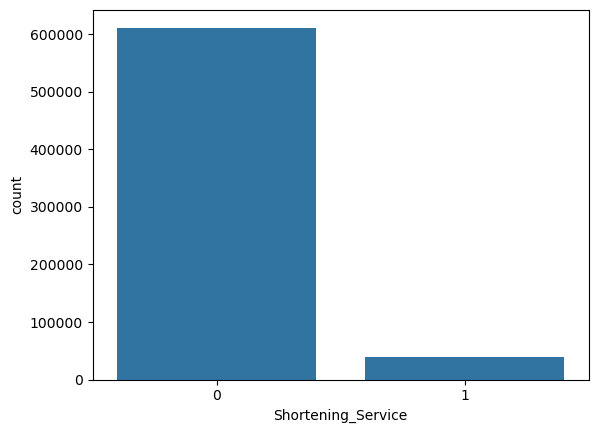

In [14]:
def Shortening_Service(url):
    """
This script defines a function Shortening_Service that checks whether a URL belongs to a known URL shortening service.

The function uses a regular expression (re.search) to match the given URL against a list of known shortening service patterns (e.g., bit.ly, goo.gl, ow.ly, etc.). 
If a match is found, it returns 1, indicating the URL is from a shortening service. If no match is found, it returns None.

The Shortening_Service function is then applied to the 'url' column of the DataFrame, and the results are stored in a new column called 
'Shortening Service'.

Finally, the script visualizes the distribution of URLs that belong to shortening services using a count plot (sns.countplot), followed by 
displaying the plot.
"""
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
df['Shortening_Service'] = df['url'].apply(lambda x: Shortening_Service(x))
sns.countplot(x='Shortening_Service', data=df);

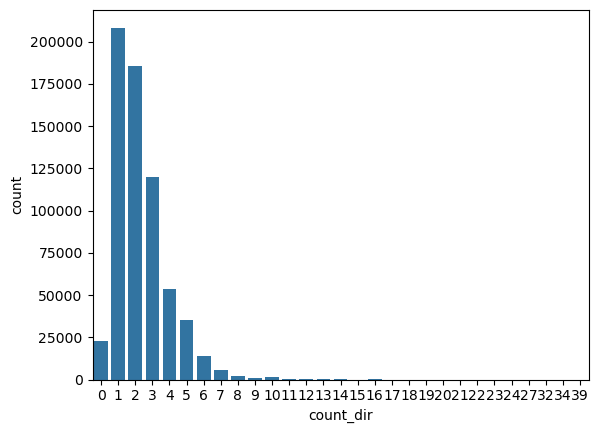

In [15]:
def no_of_dir(url):
    """
This script defines a function no_of_dir that counts the number of directories (slashes) in the path of a given URL.

The function uses urlparse to extract the path from the URL and then counts the occurrences of the '/' character in the path. 
This gives the number of directories in the URL path.

The no_of_dir function is applied to the 'url' column of the DataFrame, and the results are stored in a new column called 'count_dir'.

Finally, the script visualizes the distribution of the number of directories in the URLs using a count plot (sns.countplot), followed by displaying the plot.
"""
    urldir = urlparse(url).path
    return urldir.count('/')

df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))
sns.countplot(x='count_dir', data=df);

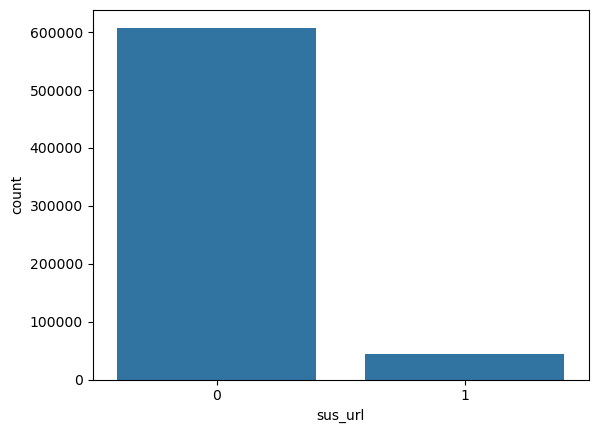

In [16]:
def suspicious_words(url):
    """
This script defines a function suspicious_words that checks if a URL contains words commonly associated with phishing or scam websites.

The function uses a regular expression (re.search) to search for keywords such as 'PayPal login', 'signin', 'bank', 'account', 'update', 'free', 'lucky', and others that are often found in suspicious URLs. 
If any of these words are found, it returns 1 (indicating a suspicious URL); otherwise, it returns 0.

The suspicious_words function is then applied to the 'url' column of the DataFrame, and the results are stored in a new column called 'sus_url'.

Finally, the script visualizes the distribution of suspicious versus non-suspicious URLs using a count plot (sns.countplot), followed by displaying the plot.
"""
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))
sns.countplot(x='sus_url', data=df);

In [17]:
#Hostname Length
"""
This script calculates the length of the hostname for each URL in the DataFrame.

It uses urlparse to extract the network location (hostname) from each URL and applies the len function to determine the length of the hostname. 
The calculated length is stored in a new column called 'hostname_length'.

Finally, the script prints the shape of the DataFrame using print(df.shape) to show the number of rows and columns.
"""
df['hostname_length'] = df['url'].apply(lambda i: len(urlparse(i).netloc))
print(df.shape)

(651191, 26)


In [18]:
"""
This script moves the 'Category' column to the last position in the DataFrame.

It creates a new column order by selecting all columns except 'Category' and appending 'Category' at the end. 
The DataFrame is then rearranged based on this new column order.

Finally, the script prints the column names of the modified DataFrame using print(df.columns) to verify the new column order.
"""
df = df[[col for col in df.columns if col != 'Category'] + ['Category']]

# Verify the column order
print(df.columns)


Index(['url', 'type', 'url_len', 'domain', '@', '?', '-', '=', '.', '#', '%',
       '+', '$', '!', '*', ',', '//', 'abnormal_url', 'https', 'digits',
       'letters', 'Shortening_Service', 'count_dir', 'sus_url',
       'hostname_length', 'Category'],
      dtype='object')


In [19]:

from sklearn.model_selection import train_test_split

"""
This script prepares data for training a neural network model using PyTorch.

1. The script drops non-numeric columns ('url', 'type', 'Category', 'domain') from the DataFrame, leaving only the relevant features for training.
2. It defines the target column y as the 'Category' column and the remaining features as X.
3. The data is then split into training and testing sets using an 80-20 split with train_test_split.
4. The training and testing data are converted into PyTorch tensors:
   - X_train_tensor and X_test_tensor store the feature values as float32 tensors (required for neural networks).
   - y_train_tensor and y_test_tensor store the labels as long tensors (required for classification tasks).
5. The script verifies the shapes and data types of the tensors to ensure they are in the correct format for training.

Finally, it prints the shapes and data types of the tensors to confirm their correctness.
"""

X = df.drop(columns=['url', 'type', 'Category','domain'])  # Drop 'url' and 'type' columns
y = df['Category']  # Target column (Category) to predict


# Split the data into training (80%) and testing (20%) sets
# The training data will be further split to create a validation set
# X: Features, y: Target labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training data into training (80%) and validation (20%) sets
# This means 60% of the data will be used for training, 20% for validation, and 20% for testing
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Convert the data to PyTorch tensors
# Features are converted to float32 as neural networks typically use this format
# Labels are converted to long as it is the appropriate format for classification tasks

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)  # Features (float32 for NN)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)  # Features (float32 for NN)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)  # Features (float32 for NN)

y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)  # Labels (Long type for classification)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)  # Labels (Long type for classification)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)  # Labels (Long type for classification)

# Verify tensor shapes and types for correctness
# Ensuring the feature tensors are of shape (num_samples, num_features)
# and that the label tensors are of type torch.long

print("Training data shape:", X_train_tensor.shape)
print("Validation data shape:", X_val_tensor.shape)
print("Test data shape:", X_test_tensor.shape)

print("X_train_tensor dtype:", X_train_tensor.dtype)  # Should be torch.float32
print("y_train_tensor dtype:", y_train_tensor.dtype)  # Should be torch.long

Training data shape: torch.Size([416761, 22])
Validation data shape: torch.Size([104191, 22])
Test data shape: torch.Size([130239, 22])
X_train_tensor dtype: torch.float32
y_train_tensor dtype: torch.int64


In [20]:
# Ensure Labels are within the correct range (0 to 3 for a 4-class problem)
# The script checks that the labels are within the expected range for classification tasks.

# Step 1: Print the minimum and maximum values of y_train_tensor before clamping
# This ensures that the labels are in the expected range and no unexpected values are present.
print(torch.min(y_train_tensor), torch.max(y_train_tensor))

# Step 2: Print the unique values in y_train_tensor to verify that all labels are accounted for
print(torch.unique(y_train_tensor))

# Step 3: Ensure labels are within the correct range (0 to 3 for a 4-class problem)
# We use torch.clamp to restrict the labels in both y_train_tensor and y_test_tensor to the valid range [0, 3]
y_train_tensor = torch.clamp(y_train_tensor, min=0, max=3)
y_test_tensor = torch.clamp(y_test_tensor, min=0, max=3)

# Step 4: For validation data, ensure labels are within the correct range as well
y_val_tensor = torch.clamp(y_val_tensor, min=0, max=3)

# Step 5: After clamping, print the minimum and maximum values again to ensure the labels fall within the expected range.
print(torch.min(y_train_tensor), torch.max(y_train_tensor))

# Step 6: Print the unique values in y_train_tensor after clamping to confirm no labels are outside the expected range
print(torch.unique(y_train_tensor))

# Note: This ensures that the labels for training, validation, and test data are properly constrained for classification tasks.

tensor(0) tensor(3)
tensor([0, 1, 2, 3])
tensor(0) tensor(3)
tensor([0, 1, 2, 3])


In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
class AdvancedNNModel(nn.Module):   ## inherit nn module    في كل حاجه محتاجينها عشان نبني المودل
    """
    A feedforward neural network model implemented with PyTorch using Sequential.

    This model consists of the following:
    1. An input layer followed by:
       - Fully connected layer with 128 units.
       - Batch normalization.
       - Dropout (40%).
    2. A second layer with:
       - Fully connected layer with 256 units.
       - Batch normalization.
       - Dropout (40%).
    3. A third layer with:
       - Fully connected layer with 256 units.
       - Batch normalization.
       - Dropout (40%).
    4. An output layer with a size equal to the number of target classes.

    Activation function: ReLU for hidden layers.
    """
    def __init__(self, input_dim, output_dim):
        super(AdvancedNNModel, self).__init__()   ## this init method initialize our modeم
        self.model = nn.Sequential(
            
            nn.Linear(input_dim, 128), ## this is the first hidden layer ,pytorch assumes that input laer is already present and passes its dimensions
            nn.BatchNorm1d(128), ##improve stability and speed of training
            nn.ReLU(),     ## apply recitified linear unit equation ==> max(0,X)
            nn.Dropout(0.4),  ## Drops 40% of neurons randomly  to prevent overfitting

            nn.Linear(128, 256),  ## second hidden layer
            nn.BatchNorm1d(256), ##improve stability and speed of training
            nn.ReLU(),           ## apply recitified linear unit equation ==> max(0,X)
            nn.Dropout(0.4),   ## Drops 40% of neurons randomly  to prevent overfitting

            nn.Linear(256, 256), ## 3rd hidden layer 
            nn.BatchNorm1d(256),  ##improve stability and speed of training
            nn.ReLU(),   ## apply recitified linear unit equation ==> max(0,X)
            nn.Dropout(0.4),    ## Drops 40% of neurons randomly  to prevent overfitting

            nn.Linear(256, output_dim)  # Output layer , our model will return logits 
        )

    def forward(self, x):
        """
        Forward pass for the model.

        Parameters:
            x (torch.Tensor): Input tensor with dimensions (batch_size, input_dim).

        Returns:
            torch.Tensor: Output tensor with dimensions (batch_size, output_dim).
        """
        return self.model(x)
        

In [22]:
# Step 2: Setup Data and Hyperparameters
# Assuming X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor are already defined

input_dim = X_train_tensor.shape[1]  # Number of input features if x tarin is  torch.Size([520952, 22]) so input_dim =22
output_dim = 4                      # Number of classes  0==>3

"""
This script sets up the training and testing data for a neural network model by:
1. Initializing the neural network model (AdvancedNNModel) with specified input and output dimensions.
2. Defining the loss function (CrossEntropyLoss) for multi-class classification problems.
3. Wrapping the training and testing data into TensorDataset objects to pair input data with corresponding labels.
4. Creating DataLoader objects for both the training and testing datasets, allowing for efficient batch processing and data shuffling during training.

"""
# Initialize the neural network model with input and output dimensions
model = AdvancedNNModel(input_dim, output_dim)
# define optimizer -Adam
optimizer = optim.Adam(model.parameters(), lr=0.001)
"""
Optimizer used for training the model.

In this model, we use Adam optimizer to update the model's parameters during training in order to minimize the loss function. .

Adam is generally a good choice for most problems due to its fast convergence and low need for tuning. However, it may lead to overfitting in some cases,
especially with complex models or small datasets.
The learning rate (lr) controls how much the model's parameters change with each update. A value too large might cause instability, while a value too 
small might make the model converge too slowly.

- *Why use it?*: Adam is effective for models with many parameters and when training data is large or noisy. It adapts to the data and requires 
little manual tuning.

"""

# Define the loss function for multi-class classification (Cross-Entropy Loss)
loss_fn = nn.CrossEntropyLoss()

"""CrossEntropyLoss is commonly used for multi-class classification problems, where the model predicts the  logits for each input 
sample. it automatically applies Softmax to the logits before calculating the cross-entropy loss.It computes the loss between the predicted class
probabilities and the true class labels. So, it combines both *Softmax* (to convert logits into probabilities) and 
*Negative Log-Likelihood Loss*  to calculate loss in one efficient function ."""


# Create a TensorDataset for training data, pairing the input features (X_train_tensor)  with their corresponding labels (y_train_tensor)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

# Similarly, create a TensorDataset for testing data (X_test_tensor and y_test_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create a TensorDataset for the validation data (assuming val_data is already defined)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)  # Assuming X_val_tensor and y_val_tensor are defined

# Create Dataloader for the validation dataset
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Create DataLoader for the training dataset. DataLoader handles batching, shuffling, and parallel loading of data
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Create DataLoader for the testing dataset. 
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False) ###shuffle=False since we do not need to shuffle test data

In [ ]:
# Step 3: Train the Model

"""
Training Loop for the Model.

This loop runs for a specified number of epochs and performs the following:

1. *Model Training*: The model is set to training mode (model.train()), which is crucial for layers like dropout and batch normalization to
         behave differently during training and testing.
  
2. *Forward Pass*: For each batch in the training dataset:
   - The model predicts outputs based on the current inputs.
   - The loss between the predicted outputs and true labels is computed.
   
3. *Backward Pass*: The loss gradients are computed by backpropagation (loss.backward()), and the model's parameters are updated using
      the optimizer (optimizer.step()).

4.
   - The *training loss* is accumulated and averaged over the entire dataset to give an idea of the model's performance.
   - The *accuracy* of predictions is calculated by comparing the predicted class with the true labels.


6. *Hyperparameters*:
   - epochs: Number of times the entire dataset is passed through the model.
   - train_loader: The training dataset in batches.
   - loss_fn: The loss function used for calculating the error.
   - optimizer: The optimizer used to update the model's parameters.


This training loop helps optimize the model, track performance, and prevent overfitting through early stopping.
"""
epochs = 25   # Define the number of epochs for training
train_losses = [] # List to store training losses for each epoch
best_val_loss = float('inf') # Initialize the best validation loss to infinity (used for early stopping)
patience = 10  # Patience for early stopping (number of epochs to wait for improvement before stopping)
patience_counter = 0  # Counter to track number of epochs without improvement

# Loop through each epoch
for epoch in range(epochs):
    
    model.train()   # Set the model to training mode (this affects layers like dropout, batchnorm)

    # Initialize training loss and correct prediction count for the current epoch
    training_loss = 0.0
    correct = 0
    total = 0

    # Loop through the training dataset in batches
    for inputs, labels in train_loader:
        
        # Forward pass: Compute model output for current batch     
        outputs = model(inputs)
        # Compute the loss between the predicted outputs and true labels
        loss = loss_fn(outputs, labels)
        # Backpropagate the error (compute gradients)
        loss.backward()
        # Update the model parameters based on the gradients     الي هم whiegts /bias
        optimizer.step()

        # Zero the gradients after each update to prevent accumulation      هيصفره عشان يمنع ال exploding gradients
        optimizer.zero_grad()

        # Accumulate running loss for the current batch
        training_loss += loss.item() 
        
        # Predict the class with the highest probability (output is logits)
        _, predicted = torch.max(outputs, 1)    ## THE _ ignores the vlues of maximum logits and the predicted stores the idices of maximum logits 
        
        correct += (predicted == labels).sum().item()  # Count correct predictions for the current batch and coverts it to scalar
        
        # Total number of samples in the current batch
        total += labels.size(0)
        
    # Calculate average loss for the epoch (over the entire training dataset)
    epoch_loss = training_loss / len(train_loader.dataset)
    
    # Calculate accuracy for the epoch
    epoch_accuracy =100*( correct / total)
    
    # Store the epoch loss in the list
    train_losses.append(epoch_loss)
    
    # Validation Step
    """
Validation Phase:

In the validation phase, the model is evaluated on a separate validation dataset (which is not used during training) to assess its performance 
after each training epoch. This phase helps monitor whether the model is generalizing well to unseen data or if it is overfitting to the training data. 

1- *Forward Pass*: During the validation phase, the model performs a forward pass on the validation dataset (inputs) to generate predictions (outputs).

2. *Loss Calculation*: The loss for each batch in the validation set is computed by comparing the model's predictions to the true labels (labels) using
                the loss function (loss_fn). The total loss is accumulated over all validation batches.

3. *Accuracy Calculation*: The predicted labels are obtained by selecting the class with the highest output score (torch.max(outputs, 1)), and these predictions are compared with the true labels. The number of correct predictions is summed up to calculate the validation accuracy.

4. *Averaging the Loss and Accuracy*:
   - The total validation loss is averaged by dividing it by the total number of samples in the validation dataset.
   - The validation accuracy is calculated as the proportion of correct predictions out of the total number of samples.

5. *Return Metrics*: The average validation loss and validation accuracy for the epoch are returned for use in early stopping, metric printing, and model evaluation.

Purpose:
The validation phase ensures that the model's performance is continuously monitored on data it hasn't seen during training. This helps to
check if the model is improving or overfitting, guiding decisions like early stopping, hyperparameter tuning, and model selection.

     """
    model.eval() # disables dropout layers and batch normalization, ensuring that the model's performance is evaluated in a deterministic manner.
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad(): #disable gradient calculations  which reduces memory usage and speeds up computations since no backpropagation is needed.
        for inputs, labels in val_loader :
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_loss = val_loss / len(test_loader.dataset)
    val_accuracy = val_correct / val_total
    """
    This code implements an early stopping mechanism for training a model.
    Early stopping is used to prevent overfitting by stopping the training process 
    once the validation loss stops improving for a specified number of epochs 
    (patience)"""     
    if val_loss < best_val_loss:   # Check if the current validation loss is less than the best recorded validation loss
        best_val_loss = val_loss # Update the best validation loss to the current validation loss
        patience_counter = 0 # Reset the patience counter since validation loss improved
    else:
        patience_counter += 1  # Increment the patience counter since validation loss did not improve
        if patience_counter >= patience: # Check if the patience counter has reached the patience limit
            print(f"Early stopping at epoch {epoch+1}")  # Print a message indicating early stopping and the current epoch
            break

    # Print metrics every 5 epochs
    if (epoch + 1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy:.4f}, "
              f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

# Save the trained model
"""
Saves the trained model's state dictionary to a file.

The state dictionary contains all the learnable parameters of the model, 
allowing you to load and reuse the model later for inference or further training.

File saved: "advanced_nn_model.pth"
"""
torch.save(model.state_dict(), "advanced_nn_model.pth")
print("Model saved as 'url_nn_model.pth'.")

# Step 4: Final Evaluation on Test Set
"""

This block evaluates the trained model on the test set to compute key performance metrics.

Steps:
1. Set the model to evaluation mode to disable dropout and batch normalization updates.
2. Use torch.no_grad() to avoid computing gradients, improving efficiency during evaluation.
3. Predict the output for the test set.
4. Convert model predictions to class labels using torch.max.
5. Calculate evaluation metrics: Accuracy, Precision, Recall, and F1 Score 

Metrics:
- Accuracy: The proportion of correctly predicted samples.
- Precision: The proportion of true positives among predicted positives.
- Recall: The proportion of true positives among actual positives.
- F1 Score: The harmonic mean of Precision and Recall.
"""
model.eval() # Set the model to evaluation mode
with torch.no_grad(): # Disable gradient computation for efficiency
    outputs = model(X_test_tensor)   # Convert outputs to class labels
    _, y_pred = torch.max(outputs, 1)

accuracy = accuracy_score(y_test_tensor.numpy(), y_pred.numpy())  ## correct/total
precision = precision_score(y_test_tensor.numpy(), y_pred.numpy(), average='weighted')   ## TP/TP+FP
recall = recall_score(y_test_tensor.numpy(), y_pred.numpy(), average='weighted')  ## TP/TP+FN
f1 = f1_score(y_test_tensor.numpy(), y_pred.numpy(), average='weighted')   #precison * recall / precision + recall

print(f"Final Test Set Metrics: "
      f"Accuracy: {accuracy:.4f}, "
      f"Precision: {precision:.4f}, "
      f"Recall: {recall:.4f}, "
      f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test_tensor.numpy(), y_pred.numpy())
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Epoch [5/25], Train Loss: 0.0083, Train Accuracy: 90.7976, Val Loss: 0.0053, Val Accuracy: 0.9267
